In [26]:
install.packages("epandist")

Installing package into ‘/opt/homebrew/lib/R/4.2/site-library’
(as ‘lib’ is unspecified)



In [27]:
library('ggplot2')
library('lattice')
library("epandist")

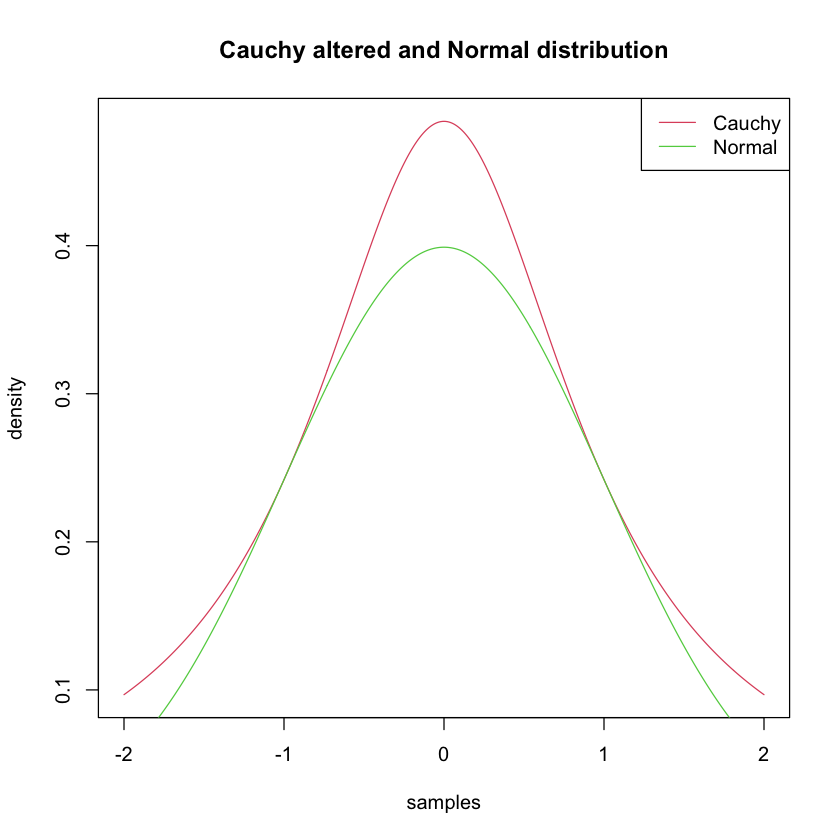

In [28]:
cauchy_distr_adj = function(x){

    return(sqrt(2 * pi / exp(1)) * (pi*(1 + x^2))^-1)
}

normal_distr = function(x){


    return(exp(- 0.5 * x^2) / sqrt(2 * pi))
}

x = seq(from = -2, to = 2, by = 0.01)

cauchy_vector = Vectorize(cauchy_distr_adj)
normal_vector = Vectorize(normal_distr)

cauchy_values = cauchy_vector(x)
normal_values = normal_vector(x)


plot(x, cauchy_values, col = 2, main = "Cauchy altered and Normal distribution", xlab= "samples", ylab="density", type='l')
lines(x, normal_values, lty = 1, col = 3)
legend(x = "topright", legend = c("Cauchy", "Normal"), col= c(2, 3), lty=c(1, 1))

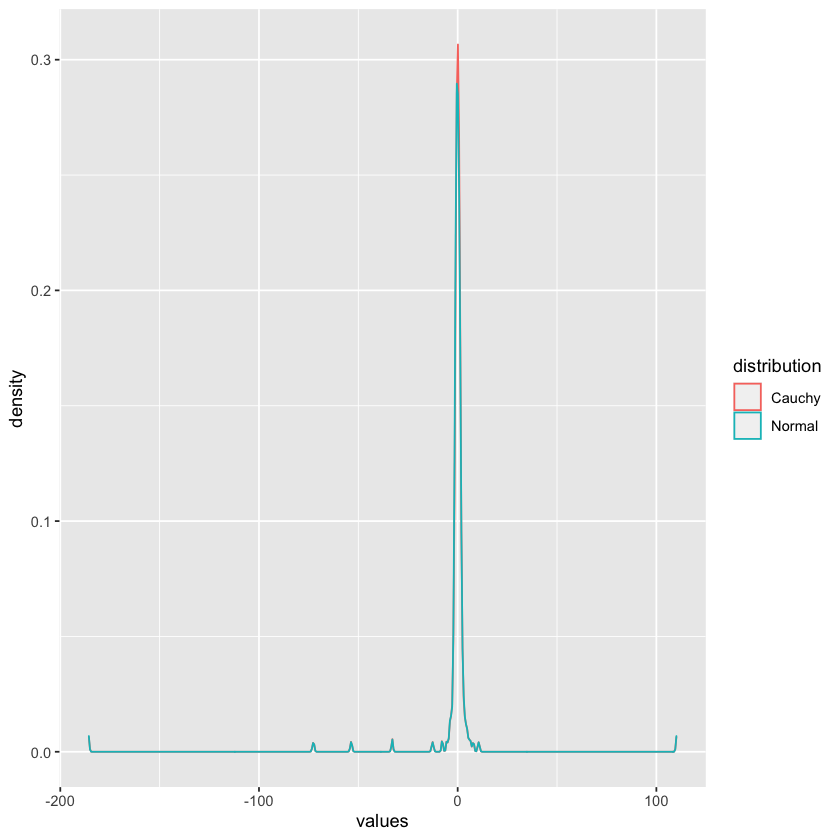

In [29]:
normal_values = rnorm(1000) # Sample from normal distribution
cauchy_values = rep(rcauchy(100), 10) # Sample from Cauchy distribution
dat = data.frame(distribution = factor(rep(c('Normal', 'Cauchy'), each = 100)), values = c(normal_values, cauchy_values))
# Store values in a data.frame
ggplot(dat, aes(x = values, colour = distribution)) + geom_density() # Plot the densinty of the two plots

In [48]:
mean_samples = c()
var_samples = c()
prob_samples = c()

for (i in 1:1000){
counter = 0

rej_samples = c()
while (length(rej_samples) < 1000){

   counter = counter + 1
   quant_value = runif(1)
   inv_sample = qcauchy(quant_value)
   temp = runif(1)
   if (dnorm(inv_sample)/ (sqrt(pi*2) / exp(0.5)  * dcauchy(inv_sample)) > temp ){

       rej_samples = append(rej_samples, inv_sample)
   }

}

prob_samples = append(prob_samples, ((length(rej_samples) / counter)))
mean_samples = append(mean_samples, mean(rej_samples))
var_samples = append(var_samples, var(rej_samples))
}

(mean(prob_samples))/0.79
mean(mean_samples)
mean(var_samples)


[1] 0.8323414

[1] -0.0003353722

[1] 1.000812

In [31]:
abs(mean(prob_samples) - exp(0.5) / sqrt(2 * pi)) / (exp(0.5) / sqrt(2 * pi))
mean(mean_samples) 
abs(mean(var_samples) - 1)

[1] 0.0006252595

[1] -0.001308829

[1] 0.000516468

so it converges

In [32]:
counter = 0 # Number of trials
acc_samples = c() # sequence of acepted values
while (length(acc_samples) < 1000){

   counter = counter + 1
   quant_value = runif(1) # Random value from standardized uniform
   inv_sample = qcauchy(quant_value) # Use the quantile function to find x
   temp = runif(1) # Random value from standardized uniform
   if (dnorm(inv_sample) / (sqrt(pi*2) * dcauchy(inv_sample) / exp(0.5)) > temp ){

       acc_samples = append(acc_samples, inv_sample)
   }

}

print((length(acc_samples) / counter))
print(sqrt(exp(1)/(2 * pi))) 
print(mean(acc_samples))
print(var(acc_samples))


[1] 0.6557377
[1] 0.6577446
[1] 0.04258298
[1] 1.016155


In [38]:
min_value = min(acc_samples)
max_value = max(acc_samples)

normal_values = seq(from = min_value, to = max_value, length.out = 1000)

dat = data.frame(acc_samples)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



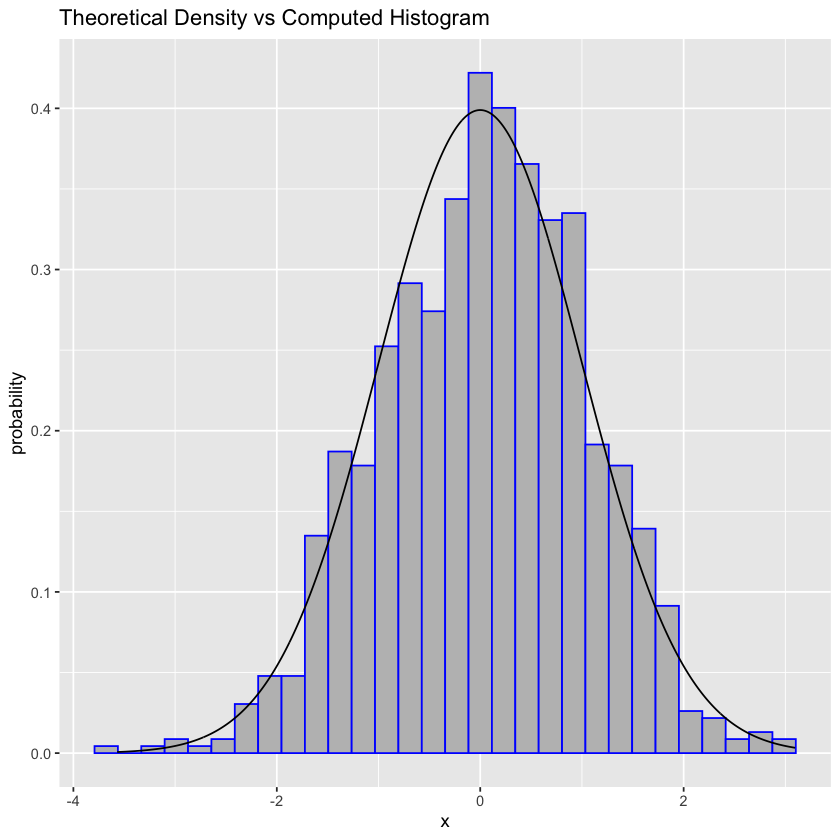

In [39]:
ggplot(dat, aes(x = acc_samples)) + geom_histogram(aes(y = ..density..), colour='blue', fill='grey') + stat_function(fun = dnorm, n = 1000, args= list(mean = 0, sd = 1)) + labs(title=('Theoretical Density vs Computed Histogram'), y='probability', x='x')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



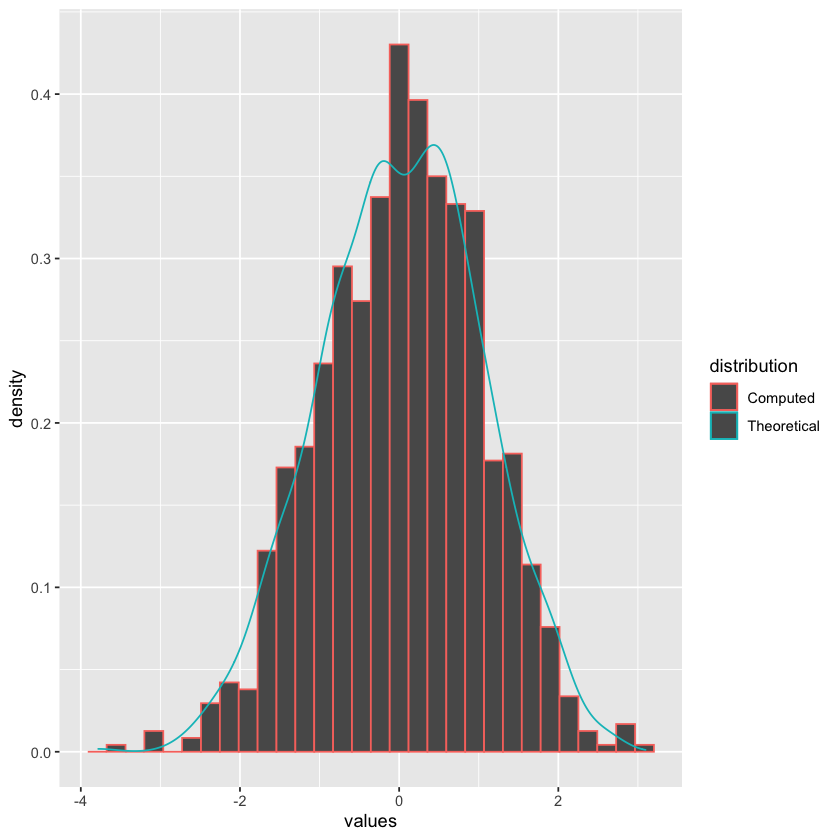

In [35]:
dat_t = data.frame(distribution = (factor(rep(c('Theoretical', 'Computed'), each = 1000))), values = c(normal_values, acc_samples))
ggplot(dat_t, aes(x = values, colour =  distribution)) + geom_histogram(aes(y = ..density..), data=subset(dat_t, distribution == 'Computed')) + geom_density(data=subset(dat_t, distribution == 'Theoretical'))

In [ ]:
head(normal_values)
head(rej_samples)

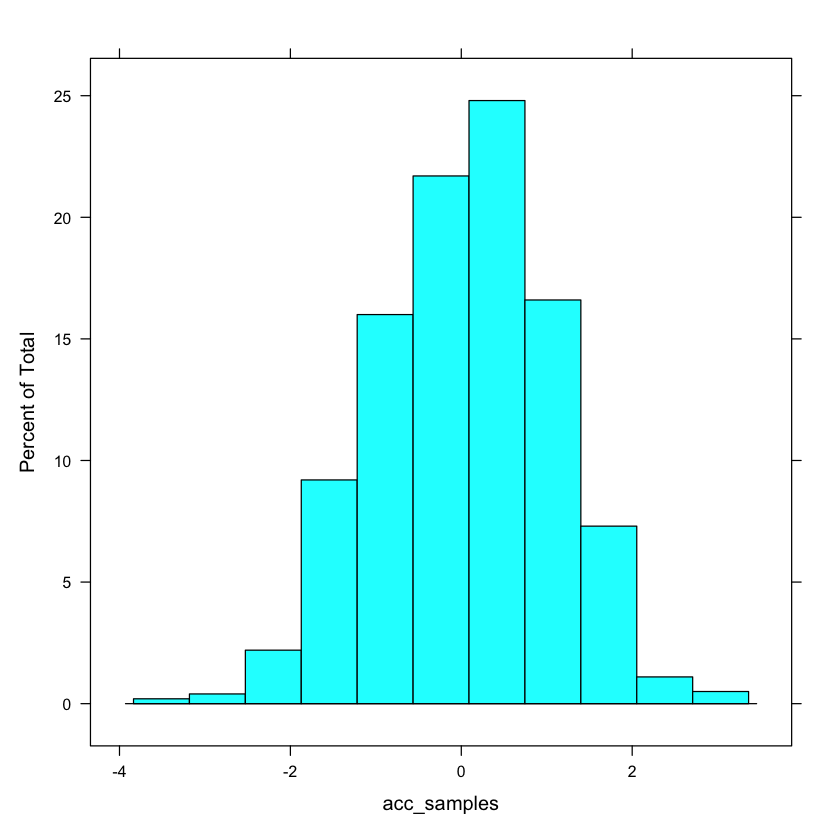

In [40]:
histogram(acc_samples)

In [24]:
sample_means = c()

for (i in 1:10000){

    uni_sample = sum(runif(80))**2/ 80
    sample_means = append(sample_means, uni_sample)
}

estimated_mean = mean(sample_means)
estimated_se = sd(sample_means)

real_mean = 20.083

print((estimated_mean - real_mean)/ real_mean)
print(estimated_se)

[1] -0.001628655
[1] 2.59279


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



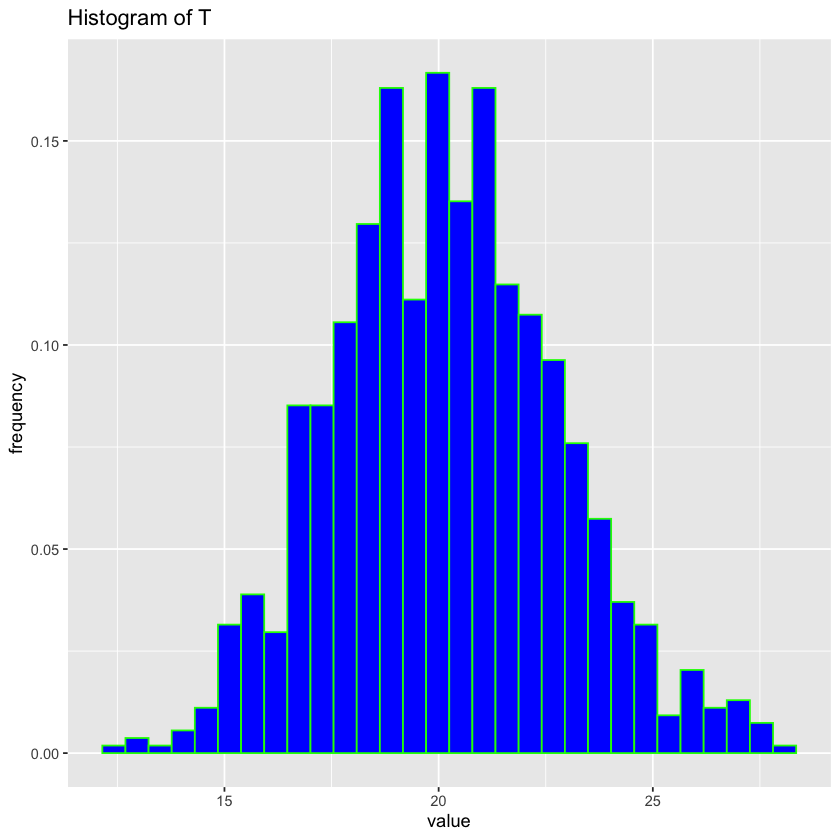

In [37]:
dat_temp = data.frame(sample_means)

ggplot(dat_temp) + geom_histogram(aes(x = sample_means, y = ..density..), colour = 'green', fill = 'blue') + labs(title="Histogram of T", x = "value", y = "frequency")

In [ ]:
filename = file.choose('data1.rds')
file_rds = readRDS(filename)

In [1]:
# Bootstrap
samples = c()
B = 10000
for ( i in 1: B){
    sample_temp = sample(file_rds, 80, replace=TRUE)
    temp = sum(sample_temp) ** 2 / 80
    samples = append(samples, temp)
 }

bootstrap_est = mean(samples)
bootstrap_se = sqrt(sum((samples - bootstrap_est)^2)/ (B - 1))
print((bootstrap_est - 20.083)/ 20.083)
print(bootstrap_se)

ERROR: Error in sample(file_rds, 80, replace = TRUE): object 'file_rds' not found


In [ ]:
#jackknife

samples_jk = c()
for (i in 1:80){
    jk_sample = file_rds[-i]
    temp = sum(jk_sample)**2/79
    samples_jk= append(samples_jk, temp)
    }

mean_est = mean(samples_jk)

jakc_kinfe_se = sqrt(79/80 * sum((samples_jk - mean_est) ** 2))

print(jakc_kinfe_se)

In [41]:
dat = data.frame(method = factor(rep(c("Classic", "Bootstrap"), each =10000)), values = c(sample_means, samples))
ggplot(dat, aes(x = values, colour = method, fill = method)) + geom_histogram(aes(y = ..density..), position="identity")

ERROR: Error in data.frame(method = factor(rep(c("Classic", "Bootstrap"), each = 10000)), : object 'samples' not found


In [44]:
negative_samples = c()
gamma_samples = c()

for (i in 1 : 5000){

    nsample_temp = rnbinom(5000, size = 1, prob = 0.5)
    psample_temp = rgamma(5000, shape = 1, rate = 1)

    negative_samples = append(negative_samples, mean(nsample_temp))
    gamma_samples = append(gamma_samples, mean(psample_temp))

}

mean(negative_samples)
mean(gamma_samples)


var(negative_samples)
var(gamma_samples)


[1] 1.000219

[1] 1.000111

[1] 0.000400031

[1] 0.0002039608

In [43]:
x = c(from = -5, to = 5, length.out= 10000)
M <- sqrt((2 * pi)/exp(1))


plot(x, normal(x), ylim=c(0, 0.7), type="l", main="Normal and Cauchy Distribution.", ylab="y", col="red")
lines(x, Mcauchy(x), col="snow4")
legend("topleft", c("normal", "M * cauchy"), fill=c("red", "gray"))

ERROR: Error in normal(x): could not find function "normal"


In [ ]:
X = c(2, 7, 3, 9)
lambda_1 = runif(1, 0, 20)
lambda_2 = runif(1, 0, 20)
# priors = runif(1, 0, 1)
priors = c(0.5, 0.5)

criterion = TRUE
i = 0
while (criterion){

  i = i + 1
  # E_step
  prob_distr_1 = dpois(X, lambda = lambda_1)
  prob_distr_2 = dpois(X, lambda = lambda_2)

  reg_sum = priors[1] * prob_distr_1 + priors[2] * prob_distr_2

  prob_distr_1 = (priors[1] * prob_distr_1) /reg_sum
  prob_distr_2 = (priors[2] * prob_distr_2) / reg_sum
  
  # M_Step
  lambda_1_previous = lambda_1
  lambda_2_previous = lambda_2

  lambda_1 = sum(prob_distr_1 * X) / sum(prob_distr_1)

  lambda_2 = sum(prob_distr_2 * X)/ sum(prob_distr_2)
  priors = c(sum(prob_distr_1)/ 4, sum(prob_distr_2)/4)

  criterion = ((lambda_1 - lambda_1_previous) ^ 2 + (lambda_2 - lambda_2_previous)^2) >= 10 ^(-10)

}

print(lambda_1)
print(lambda_2)
print(priors) 

In [49]:
f_hat = function(x, h=0.210){

eruptions_data = faithful$eruptions
centered_data = (x - eruptions_data) / h
valid_input = (abs(centered_data) < 1)

epan = sum((1 - (centered_data[valid_input] ^2))) - 1
return(0.75 * epan/ (((length(data) - 1) * h)))
}

f_hat(3)

[1] 0.01916201

In [50]:
f_epanechnikov = function(x)
{
  data = faithful$eruptions
  h_opt = 0.210
  n = length(data)

  centered_data = (x-data)/h_opt
  filter = abs(centered_data)<1
  f = 0.75 * sum(1 - centered_data[filter]*2)

  f =  f / (h_opt * n)
  return(f)
}

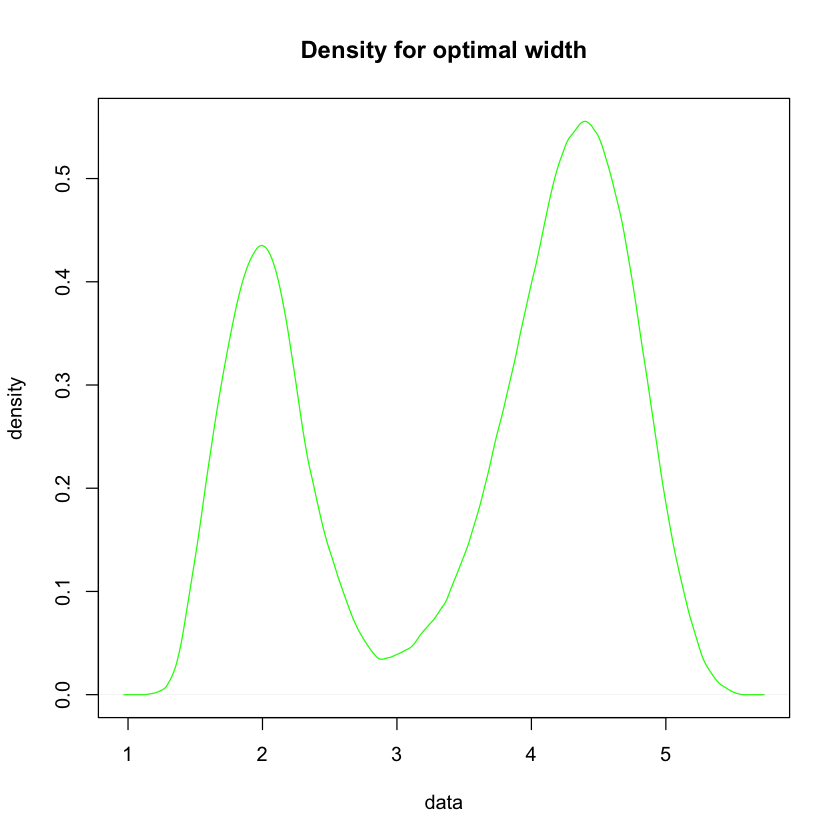

In [51]:
data = faithful$eruptions
estimated_density = density(data, kernel = "epanechnikov", bw = 0.210)
plot(estimated_density, col='green', main="Density for optimal width", xlab="data", ylab="density")

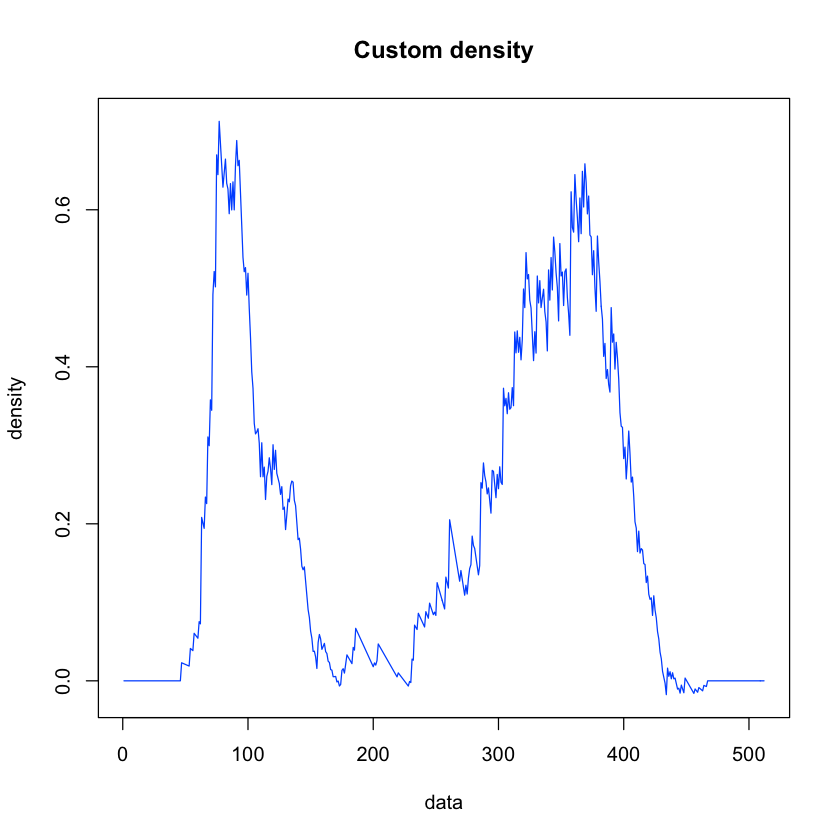

In [52]:
vf_hat = Vectorize(f_epanechnikov)

custom_density = vf_hat(estimated_density$x)

plot(0.6* vf_hat(estimated_density$x), col="#0059ff", main="Custom density", xlab="data", ylab="density", type='l')


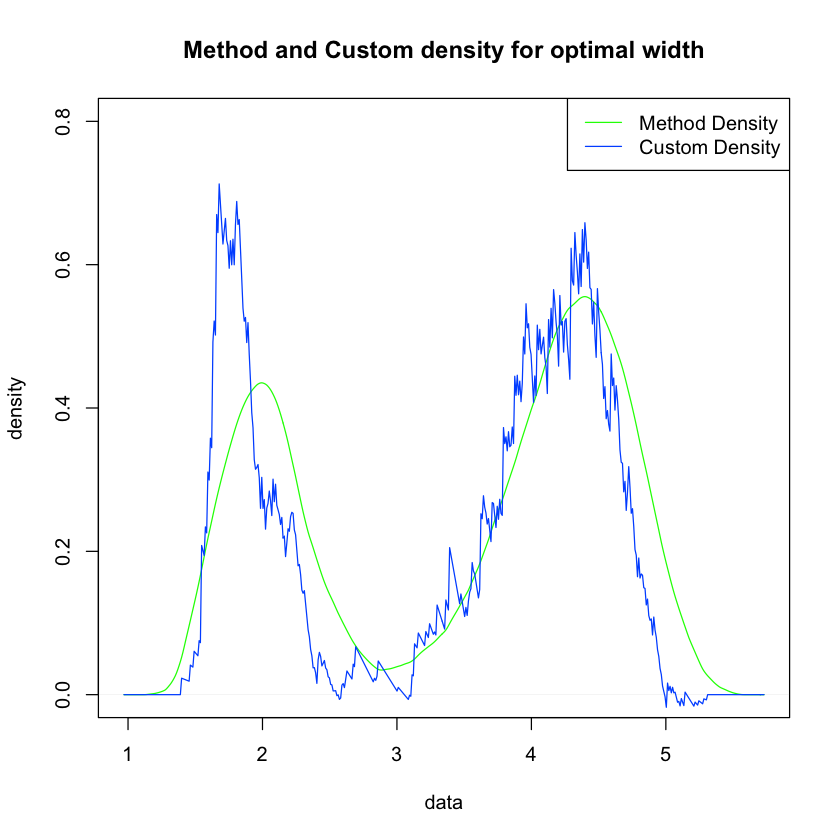

In [55]:
plot(estimated_density, col='green', main="Method and Custom density for optimal width", xlab="data", ylab="density", ylim= c(0.0, 0.8))
lines(estimated_density$x, 0.6 * custom_density, col="#0059ff", main="Estimated density", lty=1, type= "l")
legend(x = "topright", legend = c("Method Density", "Custom Density"), col= c("green", "#0059ff"), lty=c(1, 1))

In [54]:
plot(density(eruptions_data,kernel='epanechnikov', bw=0.205),col="#56ff6a", main="Theoretical and
custom density functions.", xlab="x")
lines(density(eruptions_data,kernel='epanechnikov', bw=0.205)$x, custom_density, type = "l", lty = 1, col="#171dc0")

ERROR: Error in density(eruptions_data, kernel = "epanechnikov", bw = 0.205): object 'eruptions_data' not found


In [ ]:
plot(density(data,kernel='epanechnikov', bw=0.207),col="coral1", main="Theoretical and
custom density functions.", xlab="x")
lines(estimated_density$x, custom_density, type = "l", lty = 1, col="#9932CC")

In [ ]:
integrate(vf_hat,lower = 3.5, upper = Inf)

In [ ]:
eruptions_data =faithful$eruptions

center = data[sample(1:length(data), 250, replace=TRUE)]
epan_sample = repan(250, mu = 0, r = 1)

final_sample = 0.204 * epan_sample + center

condition = final_sample >= 3.5
print(length(final_sample[condition])/ length(final_sample))

In [ ]:
c_vec = c()
n = length(data)
for (i in 1: n){

value = sum((data[i] - data)^2 / (n - 1))
c_vec = append(c_vec, value)

}

h_opt = sqrt(3 * sum(c_vec)/ n)
h_opt

In [ ]:
(n * h_opt^2 - sum(c_vec))/ h_opt^3

In [ ]:
l = function(h){
   
    return(sum(log(vf_hat(data, h=h))))
    
}

In [ ]:
h = seq(from = 0.1, to = 0.3, by = 0.01)
l_vec  = Vectorize(l)
l_val = l_vec(h)
plot(h, l_val, type='l', col='#cbcb09', xlab='h', ylab='log-likelihood', main= "Likelihood of kernel mixture")

In [ ]:
f_i <- function(data, x, h)
{
  a <- (x-data)/h
  b <- abs(a)<1
  c <- sum(1 - a[b]*2)-1
  d <- 3/(4 * h * ((length(data)-1))) 
  return(c* d)
}

L <- function(h)
{
  data <- faithful$eruptions
  f_is <- rep(0, length(data))
  for(i in 1:length(data))
  {
    f_is[i] = f_i(data, data[i], h)
  }
  return(prod(f_is))
}

h <- seq(0.17, 0.35, 0.001)
y <- rep(0, length(h))
for(i in 1:length(h)){
  y[i] = log(L(h[i]))
}
plot(h, y, type="p", col="blue")

In [ ]:
# install.packages("lars")
# install.packages("BAS")
# install.packages("combinat")
# install.packages("gtools")
# install.packages("functClust")
# install.packages("glmnet")
# install.packages("Metrics")
# install.packages("car")

Installing package into ‘/opt/homebrew/lib/R/4.2/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘backports’, ‘generics’, ‘tidyr’, ‘tidyselect’, ‘broom’, ‘dplyr’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’




In [ ]:
library("lars")
library("MASS")
library("combinat")
library("gtools")
library("functClust")
library("glmnet")
library("Metrics")
library("car")

Loaded lars 1.3



Attaching package: ‘combinat’


The following object is masked from ‘package:utils’:

    combn


Loading required package: Matrix

Loaded glmnet 4.1-4


Attaching package: ‘glmnet’


The following object is masked from ‘package:gtools’:

    na.replace


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:gtools’:

    logit




In [ ]:
data("diabetes")

In [ ]:
attach(diabetes)

In [ ]:
is.null(ncol(combn(1:10, 10)))

[1] TRUE

In [ ]:
model = lm(y ~ x[, c(1, 2)])
summary(model)


Call:
lm(formula = y ~ x[, c(1, 2)])

Residuals:
    Min      1Q  Median      3Q     Max 
-124.92  -65.50  -12.79   58.89  209.43 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       152.13       3.61  42.147  < 2e-16 ***
x[, c(1, 2)]age   301.16      77.06   3.908 0.000108 ***
x[, c(1, 2)]sex    17.39      77.06   0.226 0.821539    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 75.89 on 439 degrees of freedom
Multiple R-squared:  0.03541,	Adjusted R-squared:  0.03102 
F-statistic: 8.059 on 2 and 439 DF,  p-value: 0.0003655


In [ ]:

find_model_BIC = function(){

best_model = NULL

for (i in 1:10){

    z = (combinations(10, i))
    rows = nrow(z)

    for (j in 1 : rows){

        model = lm(y ~ x[, c(z[j, ])])

        if (is.null(best_model)){

            best_model = model
        }else{
                if (BIC(model) < BIC(best_model)){
                    best_model = model
                }

        }


    }

}
return(best_model)
}

m1 = find_model_BIC()
names(m1$coefficients) = c("(Intercept)", "sex", "bmi", "map", "hdl", "ltg")
m1$coefficients

(Intercept)         sex         bmi         map         hdl         ltg 
   152.1335   -235.7756    523.5623    326.2358   -289.1169    474.2918

In [ ]:
cv = cv.glmnet(x, y, type.measure = "mse")
m2 = coef(cv, s = "lambda.min")
m3 = coef(cv, s = "lambda.1se")

m2 = as.matrix(m2)
m3 = as.matrix(m3)
names(m2[t(m2) != 0, ])[-1]
names(m3[t(m3) != 0, ])[-1]

[1] "sex" "bmi" "map" "tc"  "hdl" "tch" "ltg" "glu"

[1] "sex" "bmi" "map" "hdl" "ltg"

In [ ]:
m2[t(m2) != 0, ]

(Intercept)         sex         bmi         map          tc         hdl 
 152.133484 -199.613568  522.333887  298.122927 -107.259553 -222.507843 
        tch         ltg         glu 
   3.436326  515.314123   55.427498

In [ ]:
m3

,s1
(Intercept),152.13348
age,0.00000
sex,-51.33499
bmi,509.50955
map,220.64138
tc,0.00000
ldl,0.00000
hdl,-152.19412
tch,0.00000
ltg,447.22918


In [ ]:
diabetes = diabetes[sample.int(length(y), length(y)),]

In [ ]:
diabetes = diabetes[sample.int(length(y), length(y)),]
folds = cut(seq(from = 1, to = length(y)),breaks=5,labels=FALSE)

m1_error = c()
m2_error = c()
m3_error = c()

for (i in 1:5){

    train_folds = diabetes[folds != i, ]
    test_folds = diabetes[folds == i, ]

    m1_train = train_folds$x[, names(coef(m1))[-1]]
    m2_train = train_folds$x[, names(m2[t(m2) != 0, ])[-1]]
    m3_train = train_folds$x[, names(m3[t(m3) != 0, ])[-1]]

    m1_meta = lm(train_folds$y ~., m1_train)
    m2_meta = lm(train_folds$y ~., m2_train)
    m3_meta = lm(train_folds$y ~., m3_train)

    y_true = test_folds$y

    m1_test = test_folds$x[, names(coef(m1))[-1]]
    m2_test = test_folds$x[, names(m2[t(m2) != 0, ])[-1]]
    m3_test = test_folds$x[, names(m3[t(m3) != 0, ])[-1]]

    m1_pred = predict(m1_meta, m1_test)
    m2_pred = predict(m2_meta, m2_test)
    m3_pred = predict(m3_meta, m3_test)

    rmse_m1 = rmse(y_true, m1_pred)
    rmse_m2 = rmse(y_true, m2_pred)
    rmse_m3 = rmse(y_true, m3_pred)

    m1_error = append(m1_error, rmse_m1)
    m2_error = append(m2_error, rmse_m2)
    m3_error = append(m3_error, rmse_m3)

}

m1_error = mean(m1_error)
m2_error = mean(m2_error)
m3_error = mean(m3_error)

which.min(c(m1_error, m2_error, m3_error))

[1] 2

In [ ]:
library(glmnet)
fit <- glmnet(x,y)
plot(fit,xvar='lambda',label=TRUE